In [5]:
folder = '../log/'
files = ! ls $folder
print(files)

choose_file = '20220115_0159'
folder = folder+choose_file
logs = ! ls $folder
print(logs)


['20220105_2052', '20220105_2054', '20220108_1619', '20220108_1621', '20220108_1702', '20220109_1314', '20220112_0004', '20220112_0229', '20220115_0159', 'exploit_20220105_2052', 'exploit_20220105_2054', 'exploit_20220112_0004']
['pettingzoo_boxing_v1_fictitious_selfplay2.log', 'pettingzoo_boxing_v1_nash_dqn_exploiter.log', 'pettingzoo_boxing_v1_nash_dqn.log', 'pettingzoo_boxing_v1_nash_ppo.log', 'pettingzoo_boxing_v1_nfsp.log', 'pettingzoo_boxing_v1_nxdo2.log', 'pettingzoo_boxing_v1_selfplay2.log', 'pettingzoo_ice_hockey_v1_fictitious_selfplay2.log', 'pettingzoo_ice_hockey_v1_nash_dqn_exploiter.log', 'pettingzoo_ice_hockey_v1_nash_dqn.log', 'pettingzoo_ice_hockey_v1_nash_ppo.log', 'pettingzoo_ice_hockey_v1_nfsp.log', 'pettingzoo_ice_hockey_v1_nxdo2.log', 'pettingzoo_ice_hockey_v1_selfplay2.log', 'pettingzoo_pong_v2_fictitious_selfplay2.log', 'pettingzoo_pong_v2_nash_dqn_exploiter.log', 'pettingzoo_pong_v2_nash_dqn.log', 'pettingzoo_pong_v2_nash_ppo.log', 'pettingzoo_pong_v2_nfsp.log',

6 Envs: ['boxing_v1', 'tennis_v2', 'pong_v2', 'ice_hockey_v1', 'surround_v1', 'SlimeVolley-v0'], 7 Methods: ['selfplay2', 'nash_dqn_exploiter', 'nxdo2', 'nash_dqn', 'fictitious_selfplay2', 'nash_ppo', 'nfsp']
pettingzoo boxing_v1 fictitious_selfplay2
pettingzoo boxing_v1 nash_dqn_exploiter
pettingzoo boxing_v1 nash_dqn
pettingzoo boxing_v1 nash_ppo
pettingzoo boxing_v1 nfsp
pettingzoo boxing_v1 nxdo2
pettingzoo boxing_v1 selfplay2
pettingzoo ice_hockey_v1 fictitious_selfplay2
pettingzoo ice_hockey_v1 nash_dqn_exploiter
pettingzoo ice_hockey_v1 nash_dqn
pettingzoo ice_hockey_v1 nash_ppo
pettingzoo ice_hockey_v1 nfsp
pettingzoo ice_hockey_v1 nxdo2
pettingzoo ice_hockey_v1 selfplay2
pettingzoo pong_v2 fictitious_selfplay2
pettingzoo pong_v2 nash_dqn_exploiter
pettingzoo pong_v2 nash_dqn
pettingzoo pong_v2 nash_ppo
pettingzoo pong_v2 nfsp
pettingzoo pong_v2 nxdo2
pettingzoo pong_v2 selfplay2
pettingzoo surround_v1 fictitious_selfplay2
pettingzoo surround_v1 nash_dqn_exploiter
pettingzoo su

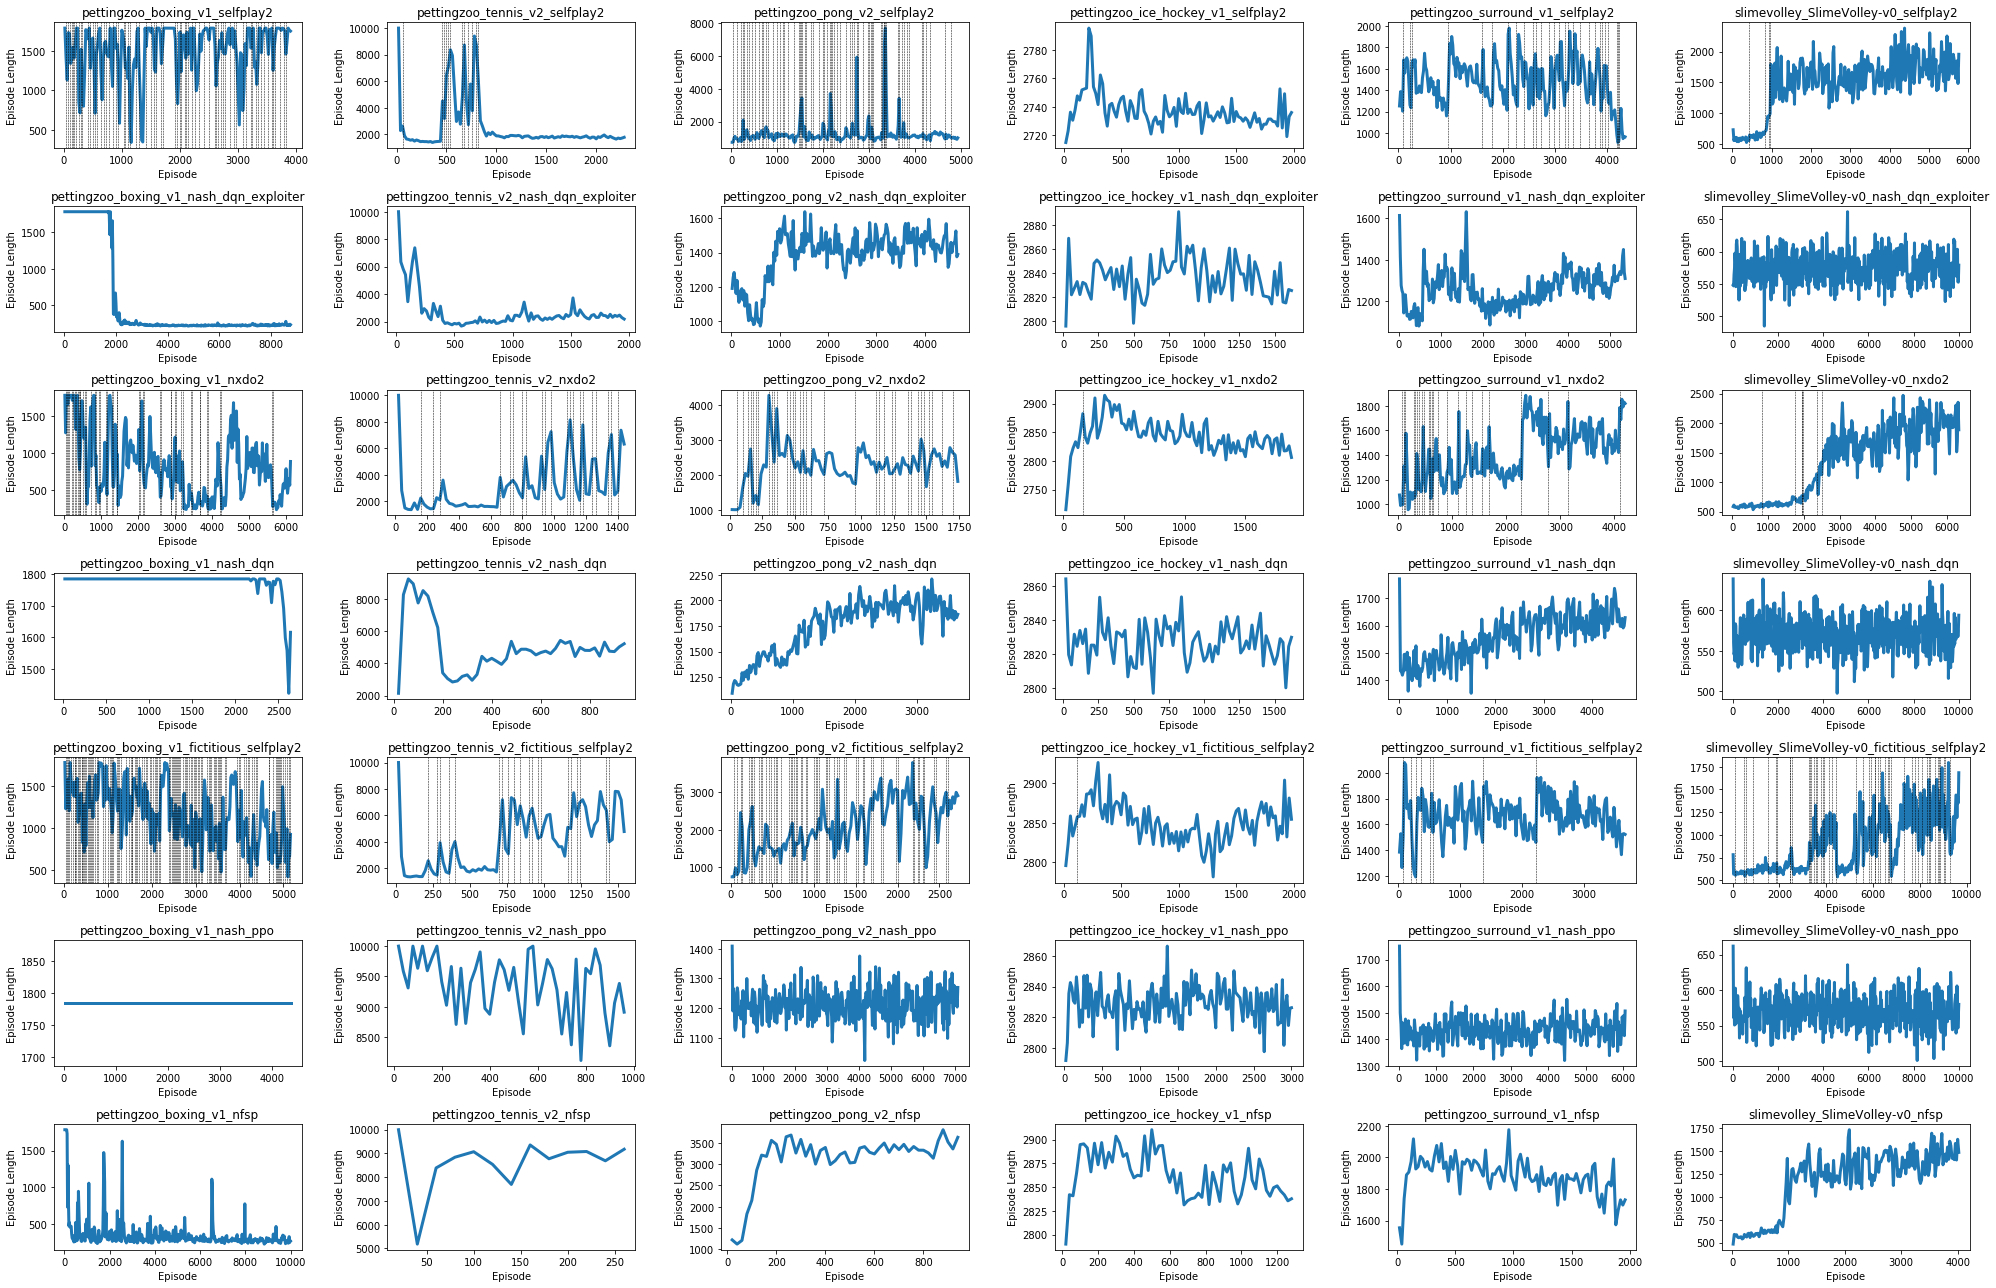

In [52]:
import re, os
import matplotlib.pyplot as plt

selfplay_based_methods = ['selfplay2', 'fictitious_selfplay2', 'nxdo2']

def parse_info(logs):
    envs, methods = [], []
    for log in logs:
        log_name = log.split('.')[0]
        # print(log_name)
        env_type, res = log_name.split('_', 1)
        env, version, method = re.split(r'(v\d)_', res) 
        env_name = env+version

        envs.append(env_name)
        methods.append(method)

    # get unique items
    envs = list(set(envs))
    methods = list(set(methods))

    return envs, methods

envs, methods = parse_info(logs)
print(f"{len(envs)} Envs: {envs}, {len(methods)} Methods: {methods}")

fig, ax = plt.subplots(nrows=len(methods), ncols=len(envs), figsize=(4*len(methods), 3*len(envs)))

for log in logs:
    log_name = log.split('.')[0]
    # print(log_name)
    env_type, res = log_name.split('_', 1)
    env, version, method = re.split(r'(v\d)_', res) 
    env_name = env+version
    print(env_type, env_name, method)
    f  = open(os.path.join(folder, log), "r")
    content = f.read()
    lines = content.splitlines()

    # print(lines)
    data = {
        'episode': [],
        'avg_length': [],
        'update_epi': [],  # episodes where selfplay based methods change the model  
        }
    cnt = 0
    for l in lines:
        if 'avg. length:' in l:
            # print(l) 
            cnt += 1
            avg_length = l.split('avg. length:')[1].split(',')[0]
            data['episode'].append(cnt*20)
            data['avg_length'].append(float(avg_length))

        if method in selfplay_based_methods:
            if 'delta:' in l:
                data['update_epi'].append(cnt*20)

    n = envs.index(env_name)
    m = methods.index(method)

    ax[m, n].set_title(log_name)
    ax[m, n].plot(data['episode'], data['avg_length'], lw=3, label='a')
    for x in data['update_epi']:
        ax[m, n].axvline(x, c='black', ls='--', lw=0.5) # plot vertical lines
    ax[m, n].set_xlabel('Episode')
    ax[m, n].set_ylabel('Episode Length')

fig.tight_layout()

In [ ]:
import re, os
import matplotlib.pyplot as plt

selfplay_based_methods = ['selfplay2', 'fictitious_selfplay2', 'nxdo2']

def parse_info(logs):
    envs, methods = [], []
    for log in logs:
        log_name = log.split('.')[0]
        # print(log_name)
        env_type, res = log_name.split('_', 1)
        env, version, method = re.split(r'(v\d)_', res) 
        env_name = env+version

        envs.append(env_name)
        methods.append(method)

    # get unique items
    envs = list(set(envs))
    methods = list(set(methods))

    return envs, methods

envs, methods = parse_info(logs)
print(f"{len(envs)} Envs: {envs}, {len(methods)} Methods: {methods}")

fig, ax = plt.subplots(nrows=len(methods), ncols=len(envs), figsize=(4*len(methods), 3*len(envs)))

for log in logs:
    log_name = log.split('.')[0]
    # print(log_name)
    env_type, res = log_name.split('_', 1)
    env, version, method = re.split(r'(v\d)_', res) 
    env_name = env+version
    print(env_type, env_name, method)
    f  = open(os.path.join(folder, log), "r")
    content = f.read()
    lines = content.splitlines()

    # print(lines)
    data = {
        'episode': [],
        'epi_reward': [],
        'update_epi': [],  # episodes where selfplay based methods change the model  
        }
    cnt = 0
    for l in lines:
        if 'episode reward:' in l and 'first_0' in l :  # only check first agent's reward, this may not be fair for some methods
            # print(l) 
            cnt += 1
            epi_reward = l.split('episode reward:')[1].split(',')[0]
            data['episode'].append(cnt*20)
            data['epi_reward'].append(float(epi_reward))

        if method in selfplay_based_methods:
            if 'delta:' in l:
                data['update_epi'].append(cnt*20)

    n = envs.index(env_name)
    m = methods.index(method)

    ax[m, n].set_title(log_name)
    ax[m, n].plot(data['episode'], data['epi_reward'], lw=3, label='a')
    for x in data['update_epi']:
        ax[m, n].axvline(x, c='black', ls='--', lw=0.5) # plot vertical lines
    ax[m, n].set_xlabel('Episode')
    ax[m, n].set_ylabel('Episode Reward')

fig.tight_layout()

In [ ]:
import json

def load_data(file_name):
    file_dir = folder+files[0]
    file_dir = folder+file_name
    print(file_dir)
    
    data = json.load( open(file_dir+"/process.json"))
    print(data.keys())
    return data

In [3]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['savefig.facecolor']='white'

def plot(data, label='reward', smooth_radius=200, savepath=None, range=10**8):
    def smooth(y, radius=200, mode='two_sided'):
        if len(y) < 2*radius+1:
            return np.ones_like(y) * y.mean()
        elif mode == 'two_sided':
            convkernel = np.ones(2 * radius+1)
            return np.convolve(y, convkernel, mode='same') / \
                   np.convolve(np.ones_like(y), convkernel, mode='same')
        elif mode == 'causal':
            convkernel = np.ones(radius)
            out = np.convolve(y, convkernel,mode='full') / \
                  np.convolve(np.ones_like(y), convkernel, mode='full')
            return out[:-radius+1]

    colors = ['r', 'b', 'c', 'y']
    
    for (k, v), c in zip(data.items(), colors):
#         if label=='RL loss':
        v=v
        plt.plot(smooth(v[:range], radius=smooth_radius), color=c, label=k)
        plt.plot(v[:range], color=c, alpha=0.3)
    plt.legend()
    plt.grid()
    plt.title(label)
    plt.xlabel('episode')
    plt.ylabel(label)
    if savepath is not None:
        plt.savefig(savepath, bbox_inches='tight',)
    
img_path = 'generated_img/'